In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [123]:
df=pd.read_csv('/content/Aviachipta narxini bashorat qilish/train_data.csv',index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [124]:
df.shape

(20000, 11)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [126]:
train=df.drop(["price"],axis=1)
train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4


In [127]:
train.shape

(20000, 10)

In [128]:
train['airline'].value_counts()

,count
airline,
Vistara,8535
Air_India,5371
Indigo,2924
GO_FIRST,1508
AirAsia,1056
SpiceJet,606


In [129]:
train.describe()

,duration,days_left
count,20000.000000,20000.000000
mean,12.177627,25.924150
std,7.157944,13.624874
min,0.830000,1.000000
25%,6.830000,14.000000
50%,11.250000,26.000000
75%,16.080000,38.000000
max,38.580000,49.000000


# Data preparation

In [130]:
train_cat=train[['airline',"flight","source_city","departure_time","stops","arrival_time","destination_city","class"]]
train_cat.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
id,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy


In [131]:
ordinal_encoder=OrdinalEncoder()
train_cat_encoder=ordinal_encoder.fit_transform(train_cat)
train_cat_encoder

array([[5.000e+00, 1.214e+03, 0.000e+00, ..., 5.000e+00, 5.000e+00,
        1.000e+00],
       [4.000e+00, 1.126e+03, 3.000e+00, ..., 5.000e+00, 4.000e+00,
        1.000e+00],
       [5.000e+00, 1.245e+03, 0.000e+00, ..., 2.000e+00, 2.000e+00,
        0.000e+00],
       ...,
       [5.000e+00, 1.235e+03, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        1.000e+00],
       [5.000e+00, 1.309e+03, 5.000e+00, ..., 4.000e+00, 0.000e+00,
        1.000e+00],
       [5.000e+00, 1.207e+03, 4.000e+00, ..., 4.000e+00, 1.000e+00,
        1.000e+00]])

In [132]:
train_cat_encoder= pd.DataFrame(train_cat_encoder,columns=['airline',"flight","source_city","departure_time","stops","arrival_time","destination_city","class"])
train_cat_encoder

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0
1,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0
2,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0
3,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0
4,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...
19995,3.0,329.0,0.0,5.0,0.0,1.0,5.0,1.0
19996,0.0,999.0,4.0,4.0,0.0,0.0,2.0,1.0
19997,5.0,1235.0,1.0,1.0,1.0,2.0,0.0,1.0
19998,5.0,1309.0,5.0,2.0,0.0,4.0,0.0,1.0


In [133]:
train_numeric=train_cat_encoder.copy()
train_numeric[["duration","days_left","price"]]=df[["duration","days_left","price"]].values
train_numeric.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21.0,7212.0
1,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7.0,5292.0
2,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5.0,60553.0
3,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28.0,5760.0
4,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4.0,10712.0


In [134]:
train_numeric.corrwith(train_numeric["price"],numeric_only=True).sort_values(ascending=False)

,0
price,1.000000
flight,0.303288
airline,0.241193
duration,0.213158
departure_time,0.058520
arrival_time,0.046801
source_city,0.013570
destination_city,0.008747
days_left,-0.102545
stops,-0.201309


# Visualization

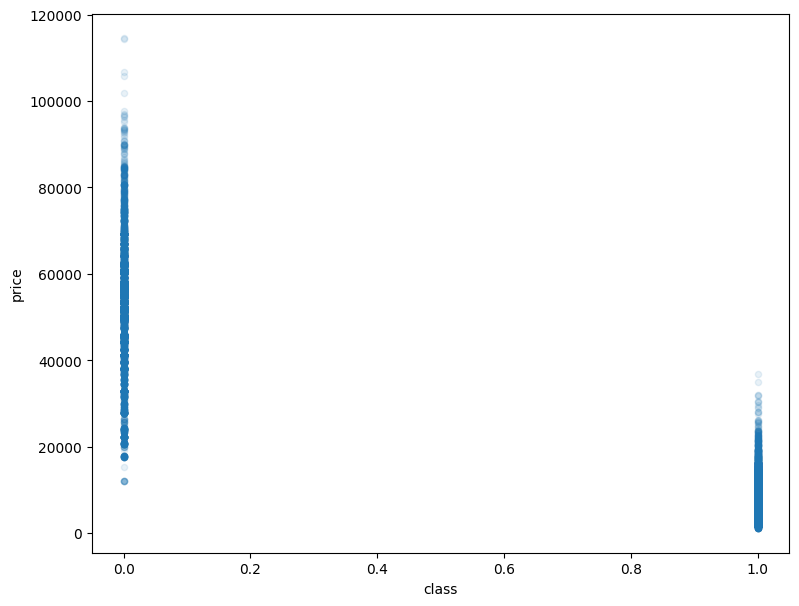

In [135]:
train_numeric.plot(kind="scatter",x="class",y="price",alpha=0.1,figsize=(9,7))
plt.show()

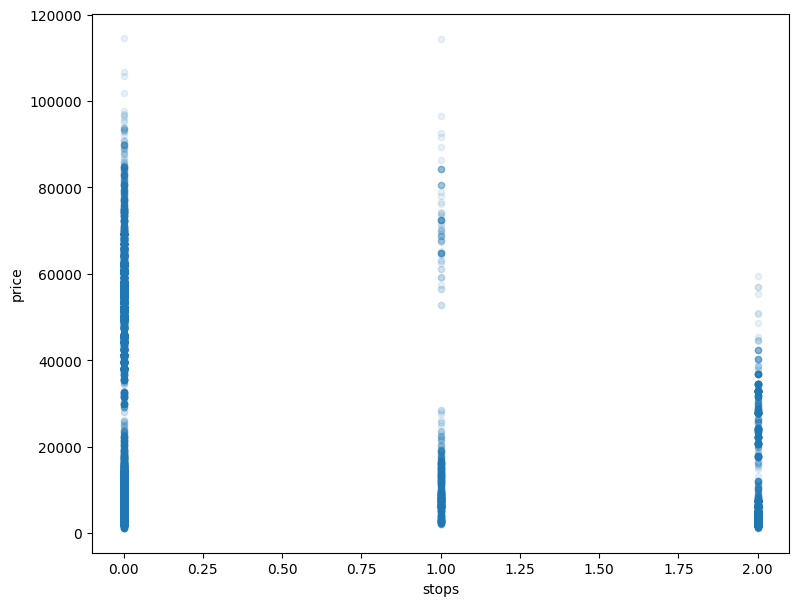

In [136]:
train_numeric.plot(kind="scatter",x="stops",y="price",alpha=0.1,figsize=(9,7))
plt.show()

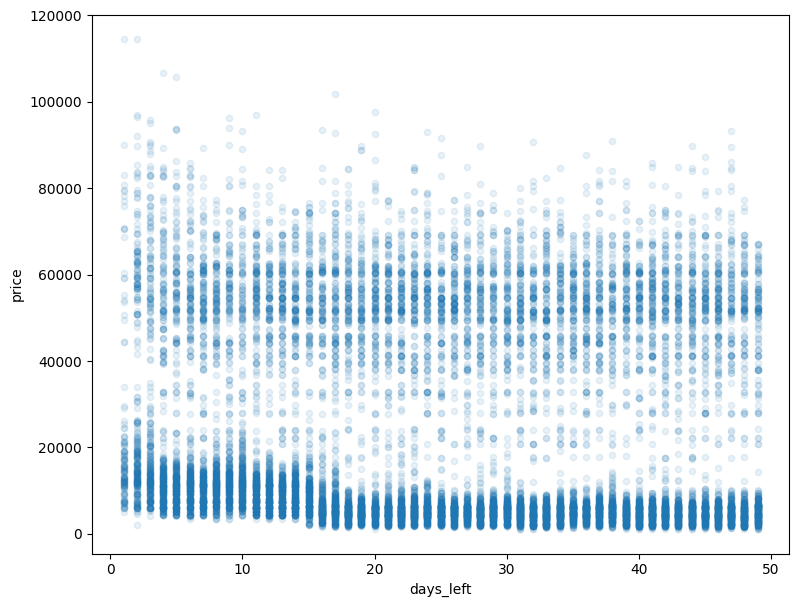

In [137]:
train_numeric.plot(kind="scatter",x="days_left",y="price",alpha=0.1,figsize=(9,7))
plt.show()

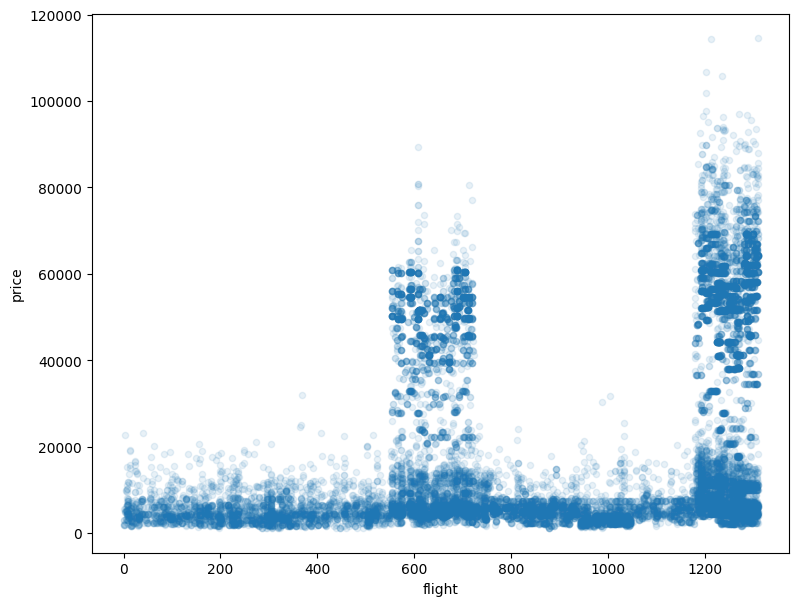

In [138]:
train_numeric.plot(kind="scatter",x="flight",y="price",alpha=0.1,figsize=(9,7))
plt.show()

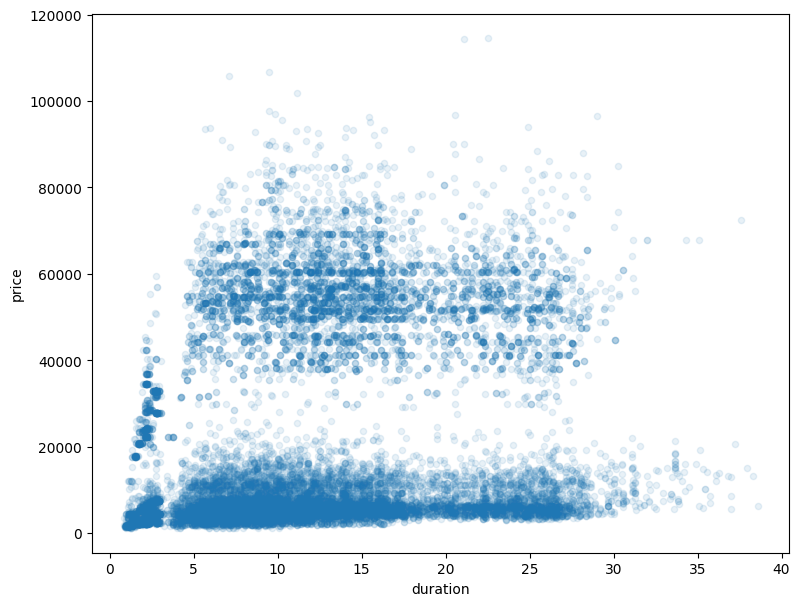

In [139]:
train_numeric.plot(kind="scatter",x="duration",y="price",alpha=0.1,figsize=(9,7))
plt.show()

# Standard-Scaler

In [140]:
standard_scaler=StandardScaler()
train_numeric=standard_scaler.fit_transform(train_numeric)
train_numeric

array([[ 1.03113236,  0.86985306, -1.4701043 , ...,  0.28952803,
        -0.36141789, -0.60365963],
       [ 0.48472127,  0.62766792,  0.23998213, ..., -1.45682723,
        -1.38897606, -0.687963  ],
       [ 1.03113236,  0.95516828, -1.4701043 , ..., -0.36291029,
        -1.53577008,  1.73843729],
       ...,
       [ 1.03113236,  0.92764724, -0.90007549, ...,  3.23458153,
        -0.65500594, -0.26951971],
       [ 1.03113236,  1.13130293,  1.38003975, ...,  0.58012154,
        -0.36141789, -0.63711753],
       [ 1.03113236,  0.85058833,  0.81001094, ...,  0.84836171,
         0.00556716, -0.6067771 ]])

In [141]:
train_numeric=pd.DataFrame(train_numeric,columns=["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class","duration","days_left","price"])
train_data=train_numeric.drop("price",axis=1)


In [142]:
train_predict=df["price"]
train_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1.031132,0.869853,-1.470104,-0.811824,-0.430679,1.106691,1.384226,0.673965,0.289528,-0.361418
1,0.484721,0.627668,0.239982,-0.242063,2.552893,1.106691,0.811415,0.673965,-1.456827,-1.388976
2,1.031132,0.955168,-1.470104,0.897459,-0.430679,-0.615250,-0.334207,-1.483758,-0.362910,-1.535770
3,1.031132,0.806555,0.810011,0.897459,-0.430679,-0.615250,0.238604,0.673965,-0.758285,0.152361
4,-0.061690,-1.714372,-0.900075,-0.811824,2.552893,0.532711,1.384226,0.673965,-1.421900,-1.609167


#Pipeline

In [143]:
num_pipeline1 = Pipeline([
        ('ordinal_encoder', OrdinalEncoder()),
    ])
num_pipeline2 = Pipeline([
        ('standard_scaler', StandardScaler()),
    ])

# Modeling

## Linear Regression

In [144]:
LR_model=LinearRegression()
LR_model.fit(train_data,train_predict)

LinearRegression()

In [145]:
test_data=train.sample(10)
test_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
16054,Indigo,6E-6488,Kolkata,Morning,one,Evening,Mumbai,Economy,4.67,6
6470,Air_India,AI-501,Bangalore,Afternoon,one,Night,Mumbai,Economy,8.25,17
8810,Vistara,UK-986,Mumbai,Night,one,Evening,Kolkata,Economy,20.83,12
304,Vistara,UK-841,Mumbai,Morning,one,Afternoon,Bangalore,Business,4.58,6
16267,Vistara,UK-933,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,11
906,GO_FIRST,G8-102,Kolkata,Afternoon,one,Night,Mumbai,Economy,7.58,3
6463,Indigo,6E-6749,Kolkata,Morning,one,Evening,Delhi,Economy,7.67,5
12283,Air_India,AI-770,Kolkata,Night,one,Evening,Mumbai,Business,21.50,33
12781,Vistara,UK-954,Mumbai,Early_Morning,one,Evening,Kolkata,Economy,12.08,48


In [146]:
test_label=train_predict.loc[test_data.index]
test_label

,price
id,
16054,11529
6470,6998
8810,11129
304,39766
16267,5955
906,7958
6463,23237
12283,50271
12781,5949


In [165]:
test_data_string=test_data.drop(["duration","days_left"],axis=1)
test_data_string=num_pipeline1.fit_transform(test_data_string)
test_data_string=pd.DataFrame(test_data_string,columns=["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class"])
test_data_string[["duration","days_left"]]=test_data[["duration","days_left"]].values
test_data_prepared=num_pipeline2.fit_transform(test_data_string)
test_data_prepared=pd.DataFrame(test_data_prepared,columns=["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class","duration","days_left"])
test_data_prepared

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,-0.256074,-1.566699,0.106000,0.447214,-0.333333,-0.185695,0.800132,0.5,-0.769628,-0.756009
1,-1.536443,-0.870388,-2.013996,-1.341641,-0.333333,1.671258,0.800132,0.5,-0.203981,0.043616
2,1.024295,1.566699,1.165998,1.341641,-0.333333,-0.185695,0.072739,0.5,1.783684,-0.319850
3,1.024295,0.522233,1.165998,0.447214,-0.333333,-2.042649,-2.109440,-2.0,-0.783848,-0.756009
4,1.024295,0.870388,-0.953998,-1.341641,3.000000,-0.185695,0.800132,0.5,-1.164632,-0.392543
5,-0.896258,-0.174078,0.106000,-1.341641,-0.333333,1.671258,0.800132,0.5,-0.309842,-0.974088
6,-0.256074,-1.218544,0.106000,0.447214,-0.333333,-0.185695,-1.382047,0.5,-0.295622,-0.828702
7,-1.536443,-0.522233,0.106000,1.341641,-0.333333,-0.185695,0.800132,-2.0,1.889545,1.206706
8,1.024295,1.218544,1.165998,-0.447214,-0.333333,-0.185695,0.072739,0.5,0.401167,2.297104
9,0.384111,0.174078,-0.953998,0.447214,-0.333333,-0.185695,-0.654654,0.5,-0.546845,0.479775


In [155]:
predicted_labels=LR_model.predict(test_data_prepared)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11671.10489709,  8626.75310514, 15410.08164097, 64906.12445667,
        5717.04266064, 12059.72891873, 11766.1013229 , 59597.77289677,
        9511.09864387, 10337.00845724])

In [156]:
pd.DataFrame({"Bashorat":predicted_labels,"Asl qiymat":test_label})

,Bashorat,Asl qiymat
id,,
16054,11671.104897,11529
6470,8626.753105,6998
8810,15410.081641,11129
304,64906.124457,39766
16267,5717.042661,5955
906,12059.728919,7958
6463,11766.101323,23237
12283,59597.772897,50271
12781,9511.098644,5949


# Random Forest

In [157]:
RF_model=RandomForestRegressor()
RF_model.fit(train_data,train_predict)

RandomForestRegressor()

In [173]:
predicted_labels=RF_model.predict(test_data_prepared)

In [174]:
pd.DataFrame({"Bashorat":predicted_labels,"Asl qiymat":test_label})

,Bashorat,Asl qiymat
id,,
16054,5603.66,11529
6470,4242.65,6998
8810,5050.98,11129
304,53891.18,39766
16267,5396.05,5955
906,6538.51,7958
6463,6558.44,23237
12283,51153.03,50271
12781,4256.77,5949


# Decision Tree

In [166]:
tree_model=DecisionTreeClassifier()
tree_model.fit(train_data,train_predict)

DecisionTreeClassifier()

In [167]:
predicted_labels=tree_model.predict(test_data_prepared)

In [168]:
pd.DataFrame({"Bashorat":predicted_labels,"Asl qiymat":test_label})

,Bashorat,Asl qiymat
id,,
16054,5293,11529
6470,8905,6998
8810,4779,11129
304,35510,39766
16267,11730,5955
906,4452,7958
6463,4836,23237
12283,51707,50271
12781,4099,5949


# Model evaluation
# MAE and RMSE

For Linear Regression

In [175]:
predicted_labels_LR=LR_model.predict(train_data)

In [177]:
#mae
mae=mean_absolute_error(train_predict,predicted_labels_LR)
print("MAE=",mae)
#rmse
rmse=mean_squared_error(train_predict,predicted_labels_LR)
print("RMSE=",np.sqrt(mse))

MAE= 4630.093298410258
RMSE= 23257.244262809814


For Random Forest

In [178]:
predicted_labels_RF=RF_model.predict(train_data)

In [179]:
#mae
mae=mean_absolute_error(train_predict,predicted_labels_RF)
print("MAE=",mae)
#rmse
rmse=mean_squared_error(train_predict,predicted_labels_RF)
print("RMSE=",np.sqrt(mse))

MAE= 582.7268876321428
RMSE= 23257.244262809814


For Decision Tree

In [180]:
predicted_labels_tree=tree_model.predict(train_data)

In [181]:
#mae
mae=mean_absolute_error(train_predict,predicted_labels_tree)
print("MAE=",mae)
#rmse
rmse=mean_squared_error(train_predict,predicted_labels_tree)
print("RMSE=",np.sqrt(mse))

MAE= 0.8832
RMSE= 23257.244262809814


In [184]:
print("DecisionTrees's Accuracy: ",metrics.accuracy_score(train_predict,predicted_labels_tree)*100,"%")

DecisionTrees's Accuracy:  99.95 %


# Test Set

In [231]:
test_set=pd.read_csv('/content/Aviachipta narxini bashorat qilish/test_data.csv',index_col=0)
test_set.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [234]:
test_set_string=test_set.drop(["duration","days_left"],axis=1)
test_set_string=num_pipeline1.fit_transform(test_set_string)
test_set_string=pd.DataFrame(test_set_string,columns=["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class"])
test_set_string[["duration","days_left"]]=test_set[["duration","days_left"]].values
test_set_prepared=num_pipeline2.fit_transform(test_set_string)
test_set_prepared=pd.DataFrame(test_set_prepared,columns=["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class","duration","days_left"])
test_set_prepared

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,-1.126472,-0.597716,0.808947,-0.214782,-0.415062,1.111881,-0.314345,-1.508109,2.179304,-1.754111
1,1.059155,0.830082,-0.327534,-0.788144,-0.415062,1.111881,1.395909,-1.508109,0.205481,0.583184
2,-1.126472,-0.788338,1.377187,-0.788144,2.627911,-1.175940,-0.884429,-1.508109,-1.413821,0.291022
3,-1.672879,0.415198,0.240707,1.505306,-0.415062,-0.032029,-0.314345,0.663082,-0.979909,-0.001139
4,-1.126472,-0.582765,0.808947,1.505306,-0.415062,-1.747895,1.395909,0.663082,0.547683,0.656225
...,...,...,...,...,...,...,...,...,...,...
4995,-1.126472,-0.586503,0.808947,-1.361507,-0.415062,0.539926,-1.454514,-1.508109,0.696883,-0.804585
4996,-0.033659,-1.461122,0.808947,0.931944,2.627911,-1.747895,1.395909,0.663082,-1.276940,1.021427
4997,-1.126472,-1.001386,0.808947,0.931944,-0.415062,1.111881,1.395909,-1.508109,-0.158623,0.802306
4998,-1.126472,-0.672469,1.377187,-0.788144,-0.415062,1.111881,0.255740,-1.508109,0.137040,0.875346


# Decision Tree

In [236]:
y_prepared=tree_model.predict(test_set_prepared)
y_prepared

array([60175, 59033, 23484, ..., 50271, 45693, 66063])

In [243]:
y_predicted=pd.DataFrame(y_prepared,columns=["price"])
y_predicted

,price
0,60175
1,59033
2,23484
3,2228
4,5102
...,...
4995,60978
4996,4499
4997,50271
4998,45693


# Sample Solution

In [238]:
sample_solution=pd.read_csv('/content/Aviachipta narxini bashorat qilish/sample_solution.csv',index_col=0)
sample_solution.head()

,price
id,
1,0
2,0
3,0
4,0
5,0


In [239]:
sample_solution.shape

(5000, 1)

In [252]:
sample_solution["price"][:sample_solution.shape[0]]=y_predicted["price"]
sample_solution

<ipython-input-252-a9e42a389db9>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample_solution["price"][:sample_solution.shape[0]]=y_predicted["price"]


,price
id,
1,60175.0
2,59033.0
3,23484.0
4,2228.0
5,5102.0
...,...
4996,60978.0
4997,4499.0
4998,50271.0
